To predict whether patient dies or not based on clinical data

In [369]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings

In [370]:
df = pd.read_csv('Covid Data.csv')
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/20,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/20,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/20,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/20,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/20,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [371]:
a=df.shape
print("Number of rows:",a[0])
print("Number of columns:",a[1])

Number of rows: 5286
Number of columns: 21


In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5286 entries, 0 to 5285
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   USMER                 5286 non-null   int64 
 1   MEDICAL_UNIT          5286 non-null   int64 
 2   SEX                   5286 non-null   int64 
 3   PATIENT_TYPE          5286 non-null   int64 
 4   DATE_DIED             5286 non-null   object
 5   INTUBED               5286 non-null   int64 
 6   PNEUMONIA             5286 non-null   int64 
 7   AGE                   5286 non-null   int64 
 8   PREGNANT              5286 non-null   int64 
 9   DIABETES              5286 non-null   int64 
 10  COPD                  5286 non-null   int64 
 11  ASTHMA                5286 non-null   int64 
 12  INMSUPR               5286 non-null   int64 
 13  HIPERTENSION          5286 non-null   int64 
 14  OTHER_DISEASE         5286 non-null   int64 
 15  CARDIOVASCULAR        5286 non-null   

In [373]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,5286.000000,5286.000000,5286.000000,5286.000000,5286.000000,5286.000000,5286.000000,5286.000000,5286.000000,5286.000000,5286.000000,5286.000000,5286.000000,5286.00000,5286.000000,5286.000000,5286.000000,5286.000000,5286.000000,5286.000000
mean,1.435679,3.212259,1.564888,1.676126,40.881574,8.282066,53.041998,55.734204,2.021188,2.217934,2.276390,2.276958,1.919221,2.40333,2.231177,1.975218,2.199395,2.293795,4.144533,41.047484
std,0.495892,0.634523,0.495819,0.467997,47.097150,24.894876,18.781262,47.097233,5.470997,5.115079,5.440644,5.600151,4.974115,6.59417,5.282690,4.200458,5.117648,6.051540,1.825063,46.996184
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,41.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.00000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000
50%,1.000000,3.000000,2.000000,2.000000,2.000000,1.000000,54.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000
75%,2.000000,4.000000,2.000000,2.000000,97.000000,2.000000,67.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,7.000000,97.000000
max,2.000000,4.000000,2.000000,2.000000,99.000000,99.000000,103.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.00000,98.000000,98.000000,98.000000,98.000000,7.000000,99.000000


In [374]:
df.isnull().sum()

,0
USMER,0
MEDICAL_UNIT,0
SEX,0
PATIENT_TYPE,0
DATE_DIED,0
INTUBED,0
PNEUMONIA,0
AGE,0
PREGNANT,0
DIABETES,0


In [375]:
df.drop_duplicates()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/20,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/20,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/20,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/20,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/20,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5281,1,4,1,2,15/04/20,2,2,67,2,1,...,2,2,2,2,2,1,2,2,5,2
5282,1,4,1,2,15/04/20,2,2,24,2,2,...,2,2,1,2,2,2,2,2,6,2
5283,2,4,1,2,15/04/20,1,2,76,2,1,...,2,2,1,2,2,1,2,2,6,1
5284,1,4,2,2,15/04/20,2,1,32,97,2,...,2,1,2,2,2,2,2,2,6,2


In [376]:
for column in df.columns:
    unique_values = df[column].unique()
    count=len(unique_values)
    print(f"Unique values in column '{column}': {unique_values}")
    print(f"Count of unique values: {count}")

Unique values in column 'USMER': [2 1]
Count of unique values: 2
Unique values in column 'MEDICAL_UNIT': [1 2 3 4]
Count of unique values: 4
Unique values in column 'SEX': [1 2]
Count of unique values: 2
Unique values in column 'PATIENT_TYPE': [1 2]
Count of unique values: 2
Unique values in column 'DATE_DIED': ['03/05/20' '03/06/20' '09/06/20' '12/06/20' '21/06/20' '9999-99-99'
 '26/02/20' '05/04/20' '08/05/20' '20/05/20' '17/07/20' '13/01/20'
 '22/01/20' '29/01/20' '13/02/20' '18/02/20' '19/02/20' '20/02/20'
 '24/02/20' '04/03/20' '07/03/20' '12/03/20' '14/03/20' '18/03/20'
 '27/03/20' '28/03/20' '29/03/20' '02/04/20' '06/04/20' '07/04/20'
 '08/04/20' '09/04/20' '10/04/20' '11/04/20' '12/04/20' '13/04/20'
 '14/04/20' '15/04/20' '16/04/20' '17/04/20' '18/04/20' '20/04/20'
 '21/04/20' '22/04/20' '23/04/20' '24/04/20' '25/04/20' '26/04/20'
 '27/04/20' '28/04/20' '29/04/20' '30/04/20' '01/05/20' '02/05/20'
 '04/05/20' '05/05/20' '06/05/20' '07/05/20' '09/05/20' '10/05/20'
 '11/05/20' '12

In [377]:
for column in df.columns:
    val = df[(df[column] == 97) | (df[column] == 98) | (df[column] == 99)]
    print(f"Extra values present in {column} ",val[column].count())

print("The size of the dataset",df.shape[0])

Extra values present in USMER  0
Extra values present in MEDICAL_UNIT  0
Extra values present in SEX  0
Extra values present in PATIENT_TYPE  0
Extra values present in DATE_DIED  0
Extra values present in INTUBED  2165
Extra values present in PNEUMONIA  370
Extra values present in AGE  6
Extra values present in PREGNANT  2990
Extra values present in DIABETES  17
Extra values present in COPD  15
Extra values present in ASTHMA  17
Extra values present in INMSUPR  18
Extra values present in HIPERTENSION  14
Extra values present in OTHER_DISEASE  25
Extra values present in CARDIOVASCULAR  16
Extra values present in OBESITY  10
Extra values present in RENAL_CHRONIC  15
Extra values present in TOBACCO  21
Extra values present in CLASIFFICATION_FINAL  0
Extra values present in ICU  2167
The size of the dataset 5286


PREGNANT COLUMN


In [378]:
sex_pregnant_counts = df.groupby(['SEX', 'PREGNANT'])['SEX'].count()

# Print the counts
print(sex_pregnant_counts)

SEX  PREGNANT
1    1             15
     2           2281
     98             4
2    97          2986
Name: SEX, dtype: int64


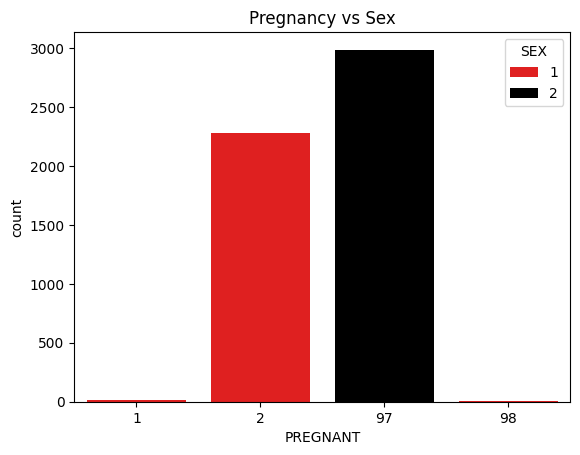

In [379]:
sns.countplot(x='PREGNANT', hue='SEX', data=df, palette=["red", "black"])
plt.title('Pregnancy vs Sex')
plt.show()

considering 1 as yes and 2 as no. So only female can be pregnant. So If we take female as 1 then it should have all 1 values.

If we take male as 2 it should have all the 2 values


In [380]:
df['PREGNANT'] = df['PREGNANT'].replace(97, 2)

In [381]:
df = df[df['PREGNANT'] != 98]

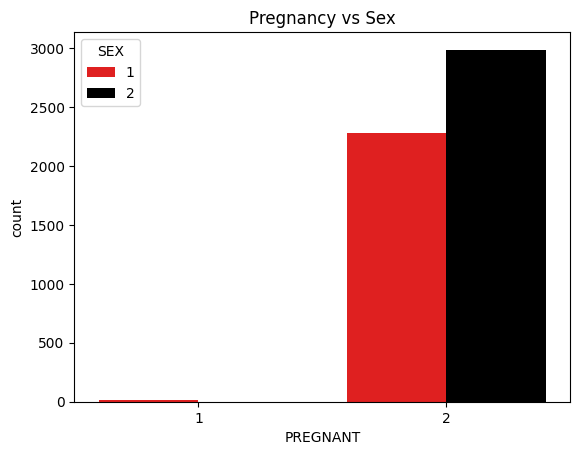

In [382]:
sns.countplot(x='PREGNANT', hue='SEX', data=df, palette=["red", "black"])
plt.title('Pregnancy vs Sex')
plt.show()

DIED COLUMN


In [383]:
df['DIED'] = df['DATE_DIED'].apply(lambda x: 2 if x == '9999-99-99' else 1)

In [384]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DIED
0,2,1,1,1,03/05/20,97,1,65,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,03/06/20,97,1,72,2,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,09/06/20,1,2,55,2,1,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,12/06/20,97,2,53,2,2,...,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,21/06/20,97,2,68,2,1,...,2,1,2,2,2,2,2,3,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5281,1,4,1,2,15/04/20,2,2,67,2,1,...,2,2,2,2,1,2,2,5,2,1
5282,1,4,1,2,15/04/20,2,2,24,2,2,...,2,1,2,2,2,2,2,6,2,1
5283,2,4,1,2,15/04/20,1,2,76,2,1,...,2,1,2,2,1,2,2,6,1,1
5284,1,4,2,2,15/04/20,2,1,32,2,2,...,1,2,2,2,2,2,2,6,2,1


In [385]:
died_counts = df['DIED'].value_counts()
print(died_counts)

DIED
1    3092
2    2190
Name: count, dtype: int64


dropping date died column


In [386]:
df.drop(columns=['DATE_DIED'], inplace=True)

INTUBED COLUMN

In [387]:
intubed_counts = df['INTUBED'].value_counts()

print(intubed_counts)

INTUBED
2     2065
97    1711
1     1053
99     453
Name: count, dtype: int64


<Axes: xlabel='INTUBED', ylabel='count'>

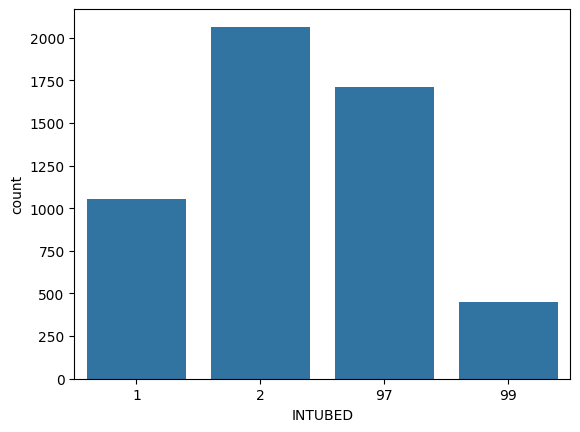

In [388]:
sns.countplot(x='INTUBED', data=df)

around 50 percentage redundant values are there so removed this column

ICU column

In [389]:
icu_counts = df['ICU'].value_counts()

print(icu_counts)

ICU
2     2746
97    1711
99     455
1      370
Name: count, dtype: int64


<Axes: xlabel='ICU', ylabel='count'>

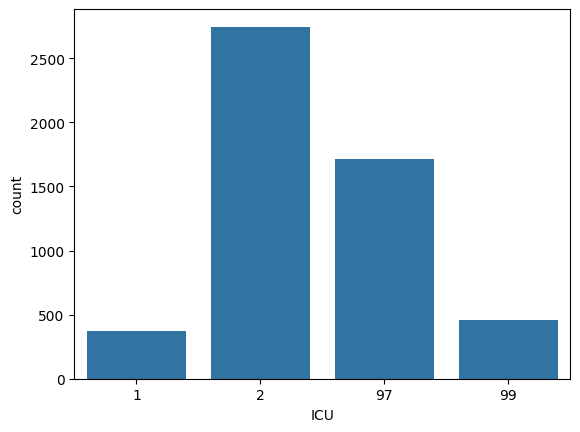

In [390]:
sns.countplot(x='ICU', data=df)

Here around 2000 redundant values and least number of yes values, so remove the ICU column

In [391]:
df2=df.drop(columns=["INTUBED","ICU"])

In [392]:
df2

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DIED
0,2,1,1,1,1,65,2,2,2,2,2,1,2,2,2,2,2,3,1
1,2,1,2,1,1,72,2,2,2,2,2,1,2,2,1,1,2,5,1
2,2,1,2,2,2,55,2,1,2,2,2,2,2,2,2,2,2,3,1
3,2,1,1,1,2,53,2,2,2,2,2,2,2,2,2,2,2,7,1
4,2,1,2,1,2,68,2,1,2,2,2,1,2,2,2,2,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5281,1,4,1,2,2,67,2,1,1,2,2,2,2,2,1,2,2,5,1
5282,1,4,1,2,2,24,2,2,2,2,2,1,2,2,2,2,2,6,1
5283,2,4,1,2,2,76,2,1,2,2,2,1,2,2,1,2,2,6,1
5284,1,4,2,2,1,32,2,2,2,2,1,2,2,2,2,2,2,6,1


In [393]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5282 entries, 0 to 5285
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   USMER                 5282 non-null   int64
 1   MEDICAL_UNIT          5282 non-null   int64
 2   SEX                   5282 non-null   int64
 3   PATIENT_TYPE          5282 non-null   int64
 4   PNEUMONIA             5282 non-null   int64
 5   AGE                   5282 non-null   int64
 6   PREGNANT              5282 non-null   int64
 7   DIABETES              5282 non-null   int64
 8   COPD                  5282 non-null   int64
 9   ASTHMA                5282 non-null   int64
 10  INMSUPR               5282 non-null   int64
 11  HIPERTENSION          5282 non-null   int64
 12  OTHER_DISEASE         5282 non-null   int64
 13  CARDIOVASCULAR        5282 non-null   int64
 14  OBESITY               5282 non-null   int64
 15  RENAL_CHRONIC         5282 non-null   int64
 16  TOBACCO    

In [394]:
for column in df2.columns:
    unique_values = df2[column].value_counts()  # Using value_counts()
    print(f"Unique values and their counts in column '{column}':")
    print(unique_values)

Unique values and their counts in column 'USMER':
USMER
1    2980
2    2302
Name: count, dtype: int64
Unique values and their counts in column 'MEDICAL_UNIT':
MEDICAL_UNIT
3    3371
4    1591
2     169
1     151
Name: count, dtype: int64
Unique values and their counts in column 'SEX':
SEX
2    2986
1    2296
Name: count, dtype: int64
Unique values and their counts in column 'PATIENT_TYPE':
PATIENT_TYPE
2    3571
1    1711
Name: count, dtype: int64
Unique values and their counts in column 'PNEUMONIA':
PNEUMONIA
1     2681
2     2231
99     370
Name: count, dtype: int64
Unique values and their counts in column 'AGE':
AGE
52     124
50     123
56     121
57     121
61     119
      ... 
94       3
100      2
99       2
103      1
98       1
Name: count, Length: 101, dtype: int64
Unique values and their counts in column 'PREGNANT':
PREGNANT
2    5267
1      15
Name: count, dtype: int64
Unique values and their counts in column 'DIABETES':
DIABETES
2     3745
1     1520
98      17
Name: coun

In [395]:
for column in df2.columns:
    val = df2[(df2[column] == 97) | (df2[column] == 98) | (df2[column] == 99)]
    print(f"Extra values present in {column} ",val[column].count())

print("The size of the dataset",df2.shape[0])

Extra values present in USMER  0
Extra values present in MEDICAL_UNIT  0
Extra values present in SEX  0
Extra values present in PATIENT_TYPE  0
Extra values present in PNEUMONIA  370
Extra values present in AGE  6
Extra values present in PREGNANT  0
Extra values present in DIABETES  17
Extra values present in COPD  15
Extra values present in ASTHMA  17
Extra values present in INMSUPR  18
Extra values present in HIPERTENSION  14
Extra values present in OTHER_DISEASE  25
Extra values present in CARDIOVASCULAR  16
Extra values present in OBESITY  10
Extra values present in RENAL_CHRONIC  15
Extra values present in TOBACCO  21
Extra values present in CLASIFFICATION_FINAL  0
Extra values present in DIED  0
The size of the dataset 5282


In [396]:
columns_to_clean = ['PNEUMONIA',  'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC','TOBACCO']

for column in columns_to_clean:
    df2 = df2[(df2[column] == 1) | (df2[column] == 2)]

In [397]:
for column in df2.columns:
    val = df2[(df2[column] == 97) | (df2[column] == 98) | (df2[column] == 99)]
    print(f"Extra values present in {column} ",val[column].count())

print("The size of the dataset",df2.shape[0])

Extra values present in USMER  0
Extra values present in MEDICAL_UNIT  0
Extra values present in SEX  0
Extra values present in PATIENT_TYPE  0
Extra values present in PNEUMONIA  0
Extra values present in AGE  5
Extra values present in PREGNANT  0
Extra values present in DIABETES  0
Extra values present in COPD  0
Extra values present in ASTHMA  0
Extra values present in INMSUPR  0
Extra values present in HIPERTENSION  0
Extra values present in OTHER_DISEASE  0
Extra values present in CARDIOVASCULAR  0
Extra values present in OBESITY  0
Extra values present in RENAL_CHRONIC  0
Extra values present in TOBACCO  0
Extra values present in CLASIFFICATION_FINAL  0
Extra values present in DIED  0
The size of the dataset 4863


DIED COLUMN

<Axes: xlabel='AGE', ylabel='Count'>

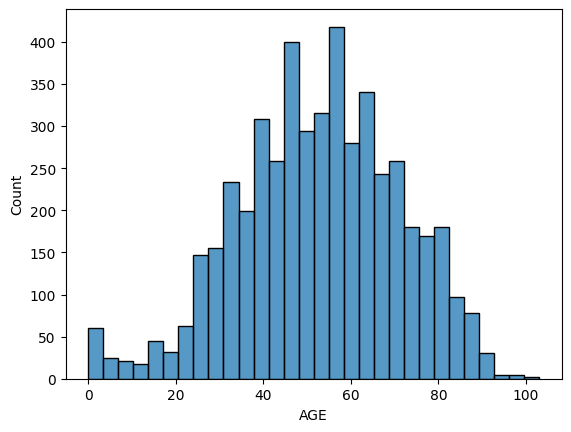

In [398]:
sns.histplot(x="AGE",data=df2,bins=30)

plots on SEX and DIED

<Axes: xlabel='DIED', ylabel='count'>

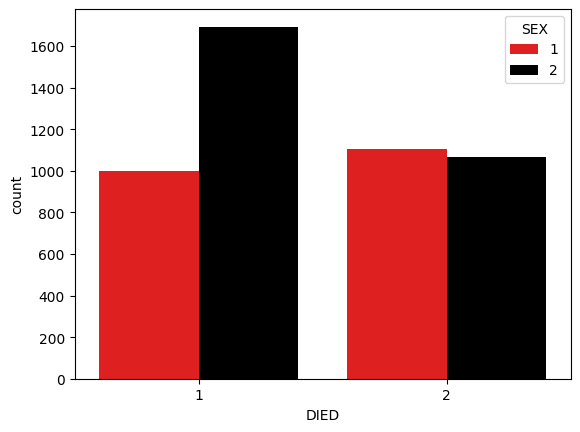

In [399]:
sns.countplot(x='DIED', hue='SEX', data=df2, palette=["red", "black"])

AGE and DIED

Text(0.5, 1.0, 'DIED vs AGE stripplot plot')

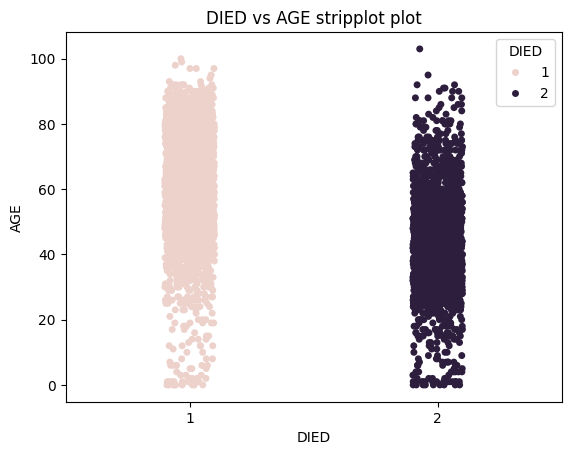

In [400]:
sns.stripplot(x="DIED", y="AGE",data=df2, hue='DIED')
plt.title(('DIED vs AGE stripplot plot'))

SEX with TOBACCO,OBESITY,PATIENT TYPE,ASTHAMA,

<Axes: xlabel='TOBACCO', ylabel='count'>

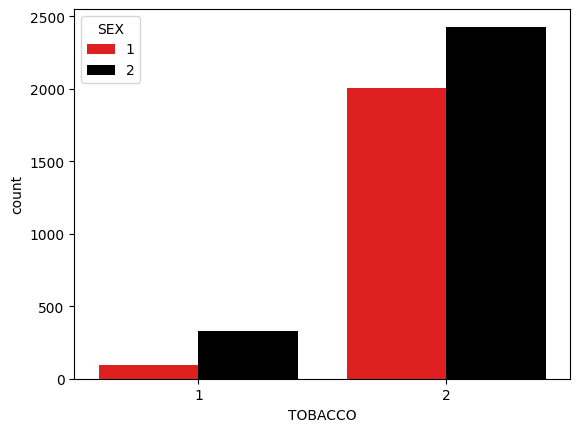

In [401]:
sns.countplot(x='TOBACCO', hue='SEX', data=df2, palette=["red", "black"])

<Axes: xlabel='OBESITY', ylabel='count'>

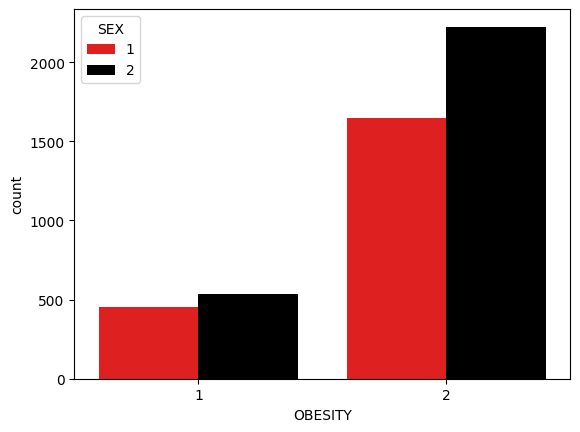

In [402]:
sns.countplot(x='OBESITY', hue='SEX', data=df2, palette=["red", "black"])

<Axes: xlabel='ASTHMA', ylabel='count'>

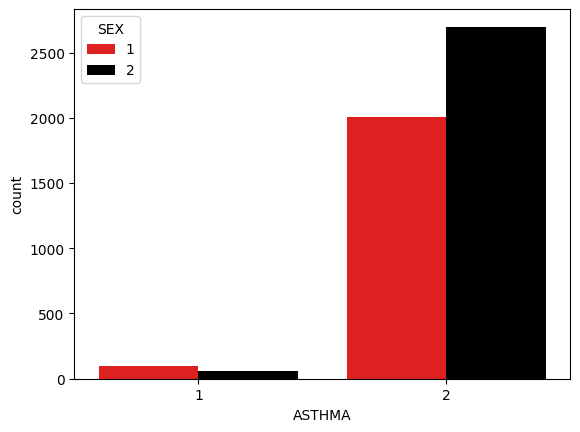

In [403]:
sns.countplot(x='ASTHMA', hue='SEX', data=df2, palette=["red", "black"])

<Axes: xlabel='COPD', ylabel='count'>

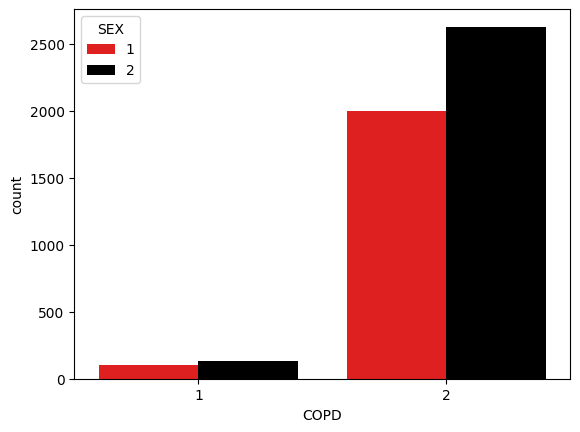

In [404]:
sns.countplot(x='COPD', hue='SEX', data=df2, palette=["red", "black"])

<Axes: xlabel='INMSUPR', ylabel='count'>

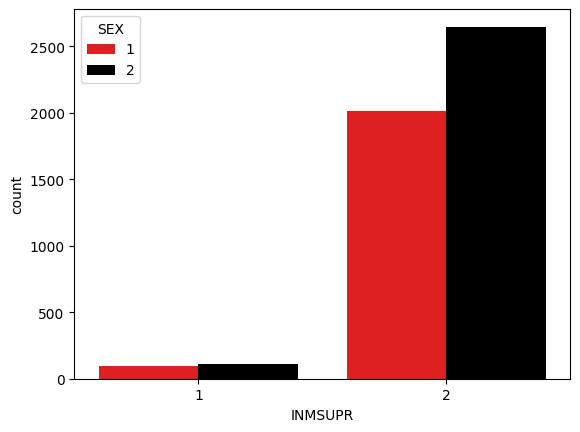

In [405]:
sns.countplot(x='INMSUPR', hue='SEX', data=df2, palette=["red", "black"])

strip plot AGe with sex, diabities,Hipertension,Cardiovascular,renal chronic

<Axes: xlabel='SEX', ylabel='AGE'>

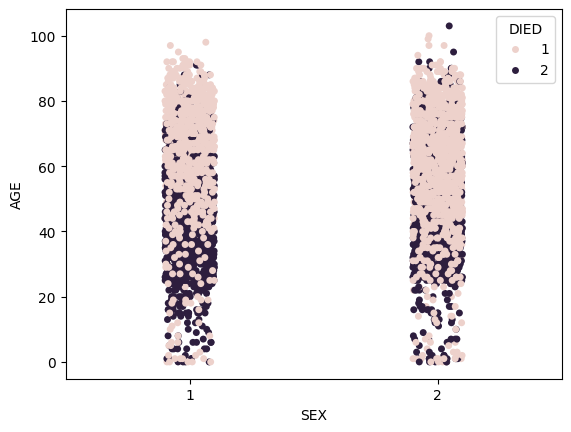

In [406]:
sns.stripplot(x="SEX", y="AGE",data=df2, hue='DIED')

<Axes: xlabel='DIABETES', ylabel='AGE'>

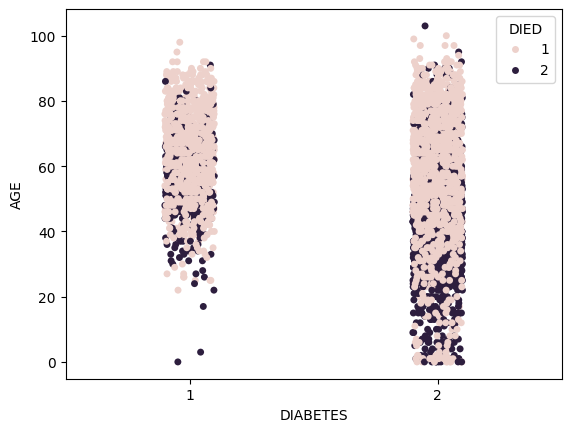

In [407]:
sns.stripplot(x="DIABETES", y="AGE",data=df2, hue='DIED')

<Axes: xlabel='HIPERTENSION', ylabel='AGE'>

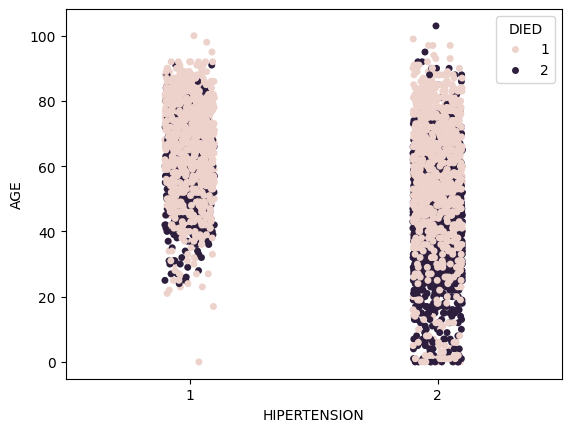

In [408]:
sns.stripplot(x="HIPERTENSION", y="AGE",data=df2, hue='DIED')

<Axes: xlabel='CARDIOVASCULAR', ylabel='AGE'>

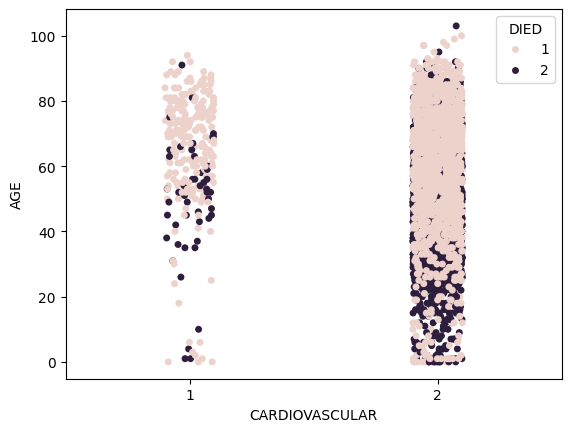

In [409]:
sns.stripplot(x="CARDIOVASCULAR", y="AGE",data=df2, hue='DIED')

<Axes: xlabel='RENAL_CHRONIC', ylabel='AGE'>

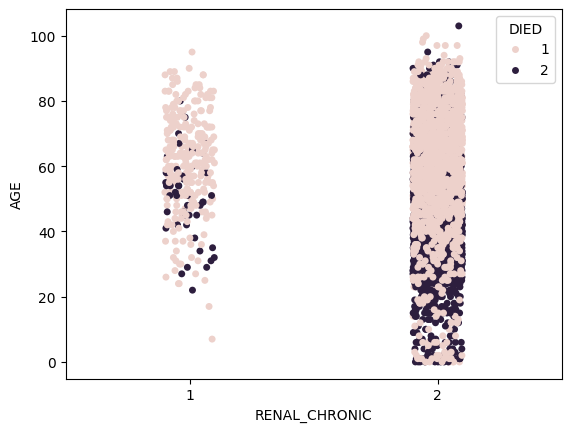

In [410]:
sns.stripplot(x="RENAL_CHRONIC", y="AGE",data=df2, hue='DIED')

Histogram plots

<Axes: xlabel='CLASIFFICATION_FINAL', ylabel='Count'>

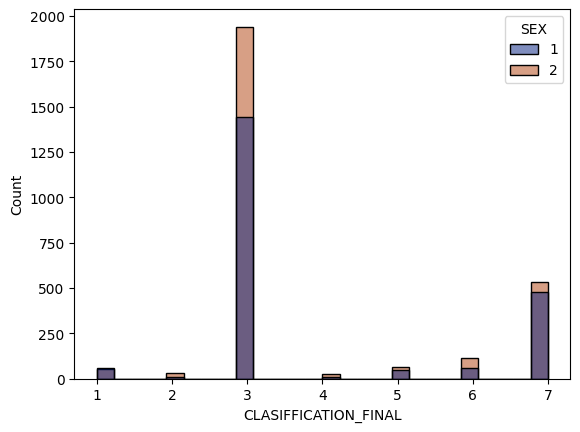

In [411]:
sns.histplot(x='CLASIFFICATION_FINAL', data=df2,hue='SEX', palette='dark')

<Axes: xlabel='USMER', ylabel='Count'>

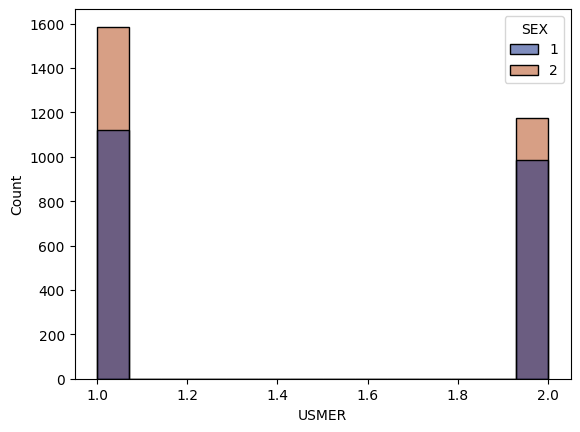

In [412]:
sns.histplot(x='USMER', data=df2,hue='SEX', palette='dark')

<Axes: xlabel='OTHER_DISEASE', ylabel='Count'>

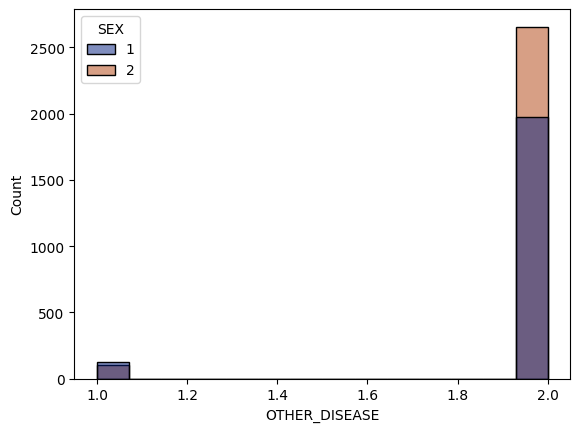

In [413]:
sns.histplot(x='OTHER_DISEASE', data=df2,hue='SEX', palette='dark')

<Axes: xlabel='PNEUMONIA', ylabel='Count'>

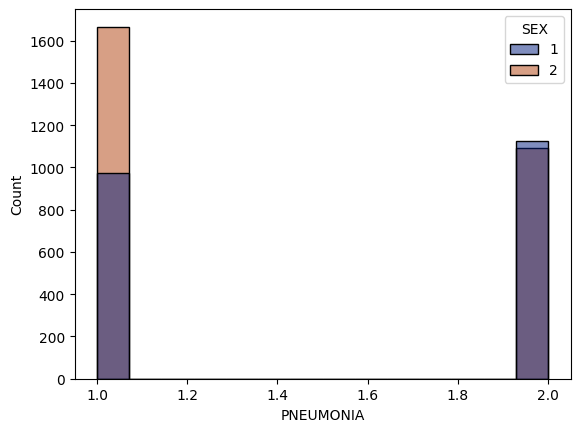

In [414]:
sns.histplot(x='PNEUMONIA', data=df2,hue='SEX', palette='dark')

<Axes: xlabel='PATIENT_TYPE', ylabel='Count'>

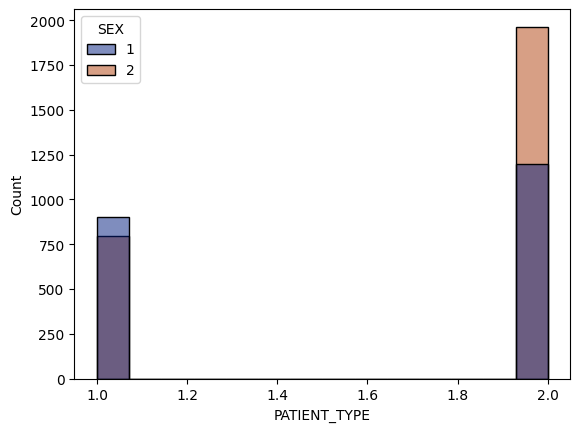

In [415]:
sns.histplot(x='PATIENT_TYPE', data=df2,hue='SEX', palette='dark')

<Axes: xlabel='MEDICAL_UNIT', ylabel='Count'>

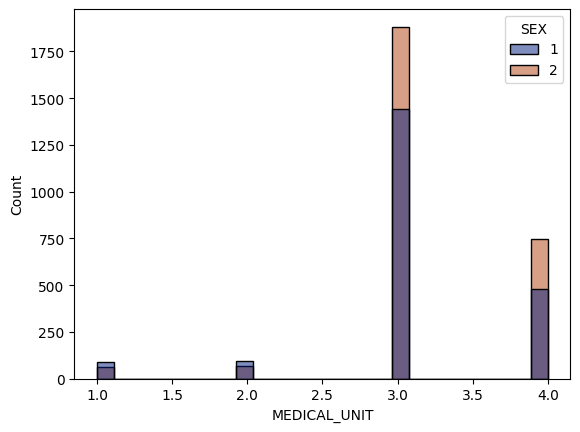

In [416]:
sns.histplot(x='MEDICAL_UNIT', data=df2,hue='SEX', palette='dark')

BOX plots

Text(0.5, 1.0, 'DIABETES vs AGE box plot')

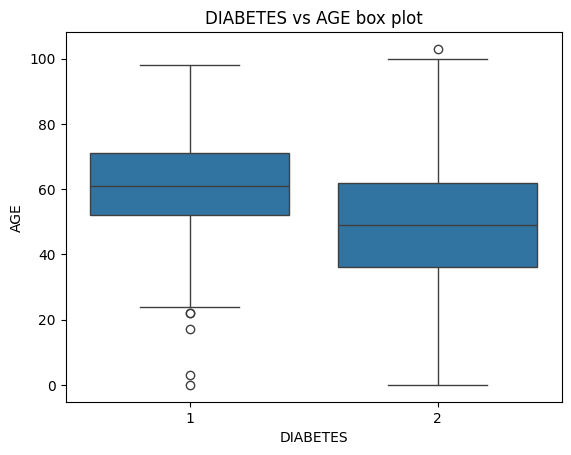

In [417]:
sns.boxplot(x="DIABETES", y="AGE",data=df2)
plt.title(('DIABETES vs AGE box plot'))

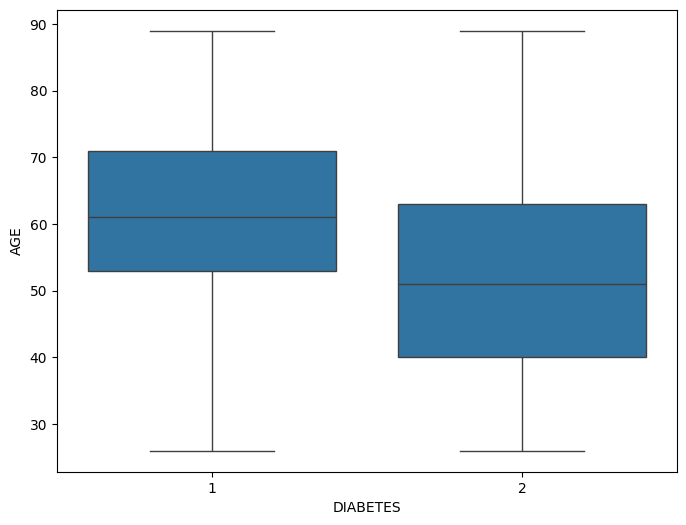

In [418]:
df2 = df2[ (df2['AGE'] > 25) & (df2['AGE'] < 90)]

plt.figure(figsize=(8, 6))
sns.boxplot(x="DIABETES", y="AGE",data=df2)
plt.show()

Text(0.5, 1.0, 'ASTHMA vs AGE box plot')

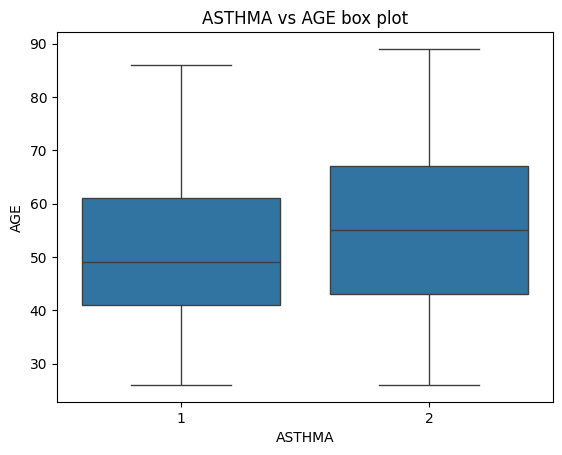

In [419]:
sns.boxplot(x="ASTHMA", y="AGE",data=df2)
plt.title(('ASTHMA vs AGE box plot'))

Text(0.5, 1.0, 'OBESITY vs AGE box plot')

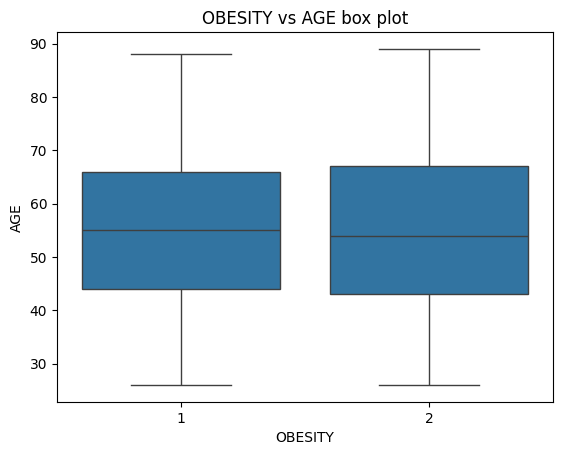

In [420]:
sns.boxplot(x="OBESITY", y="AGE",data=df2)
plt.title(('OBESITY vs AGE box plot'))

MUltivariate Analysis

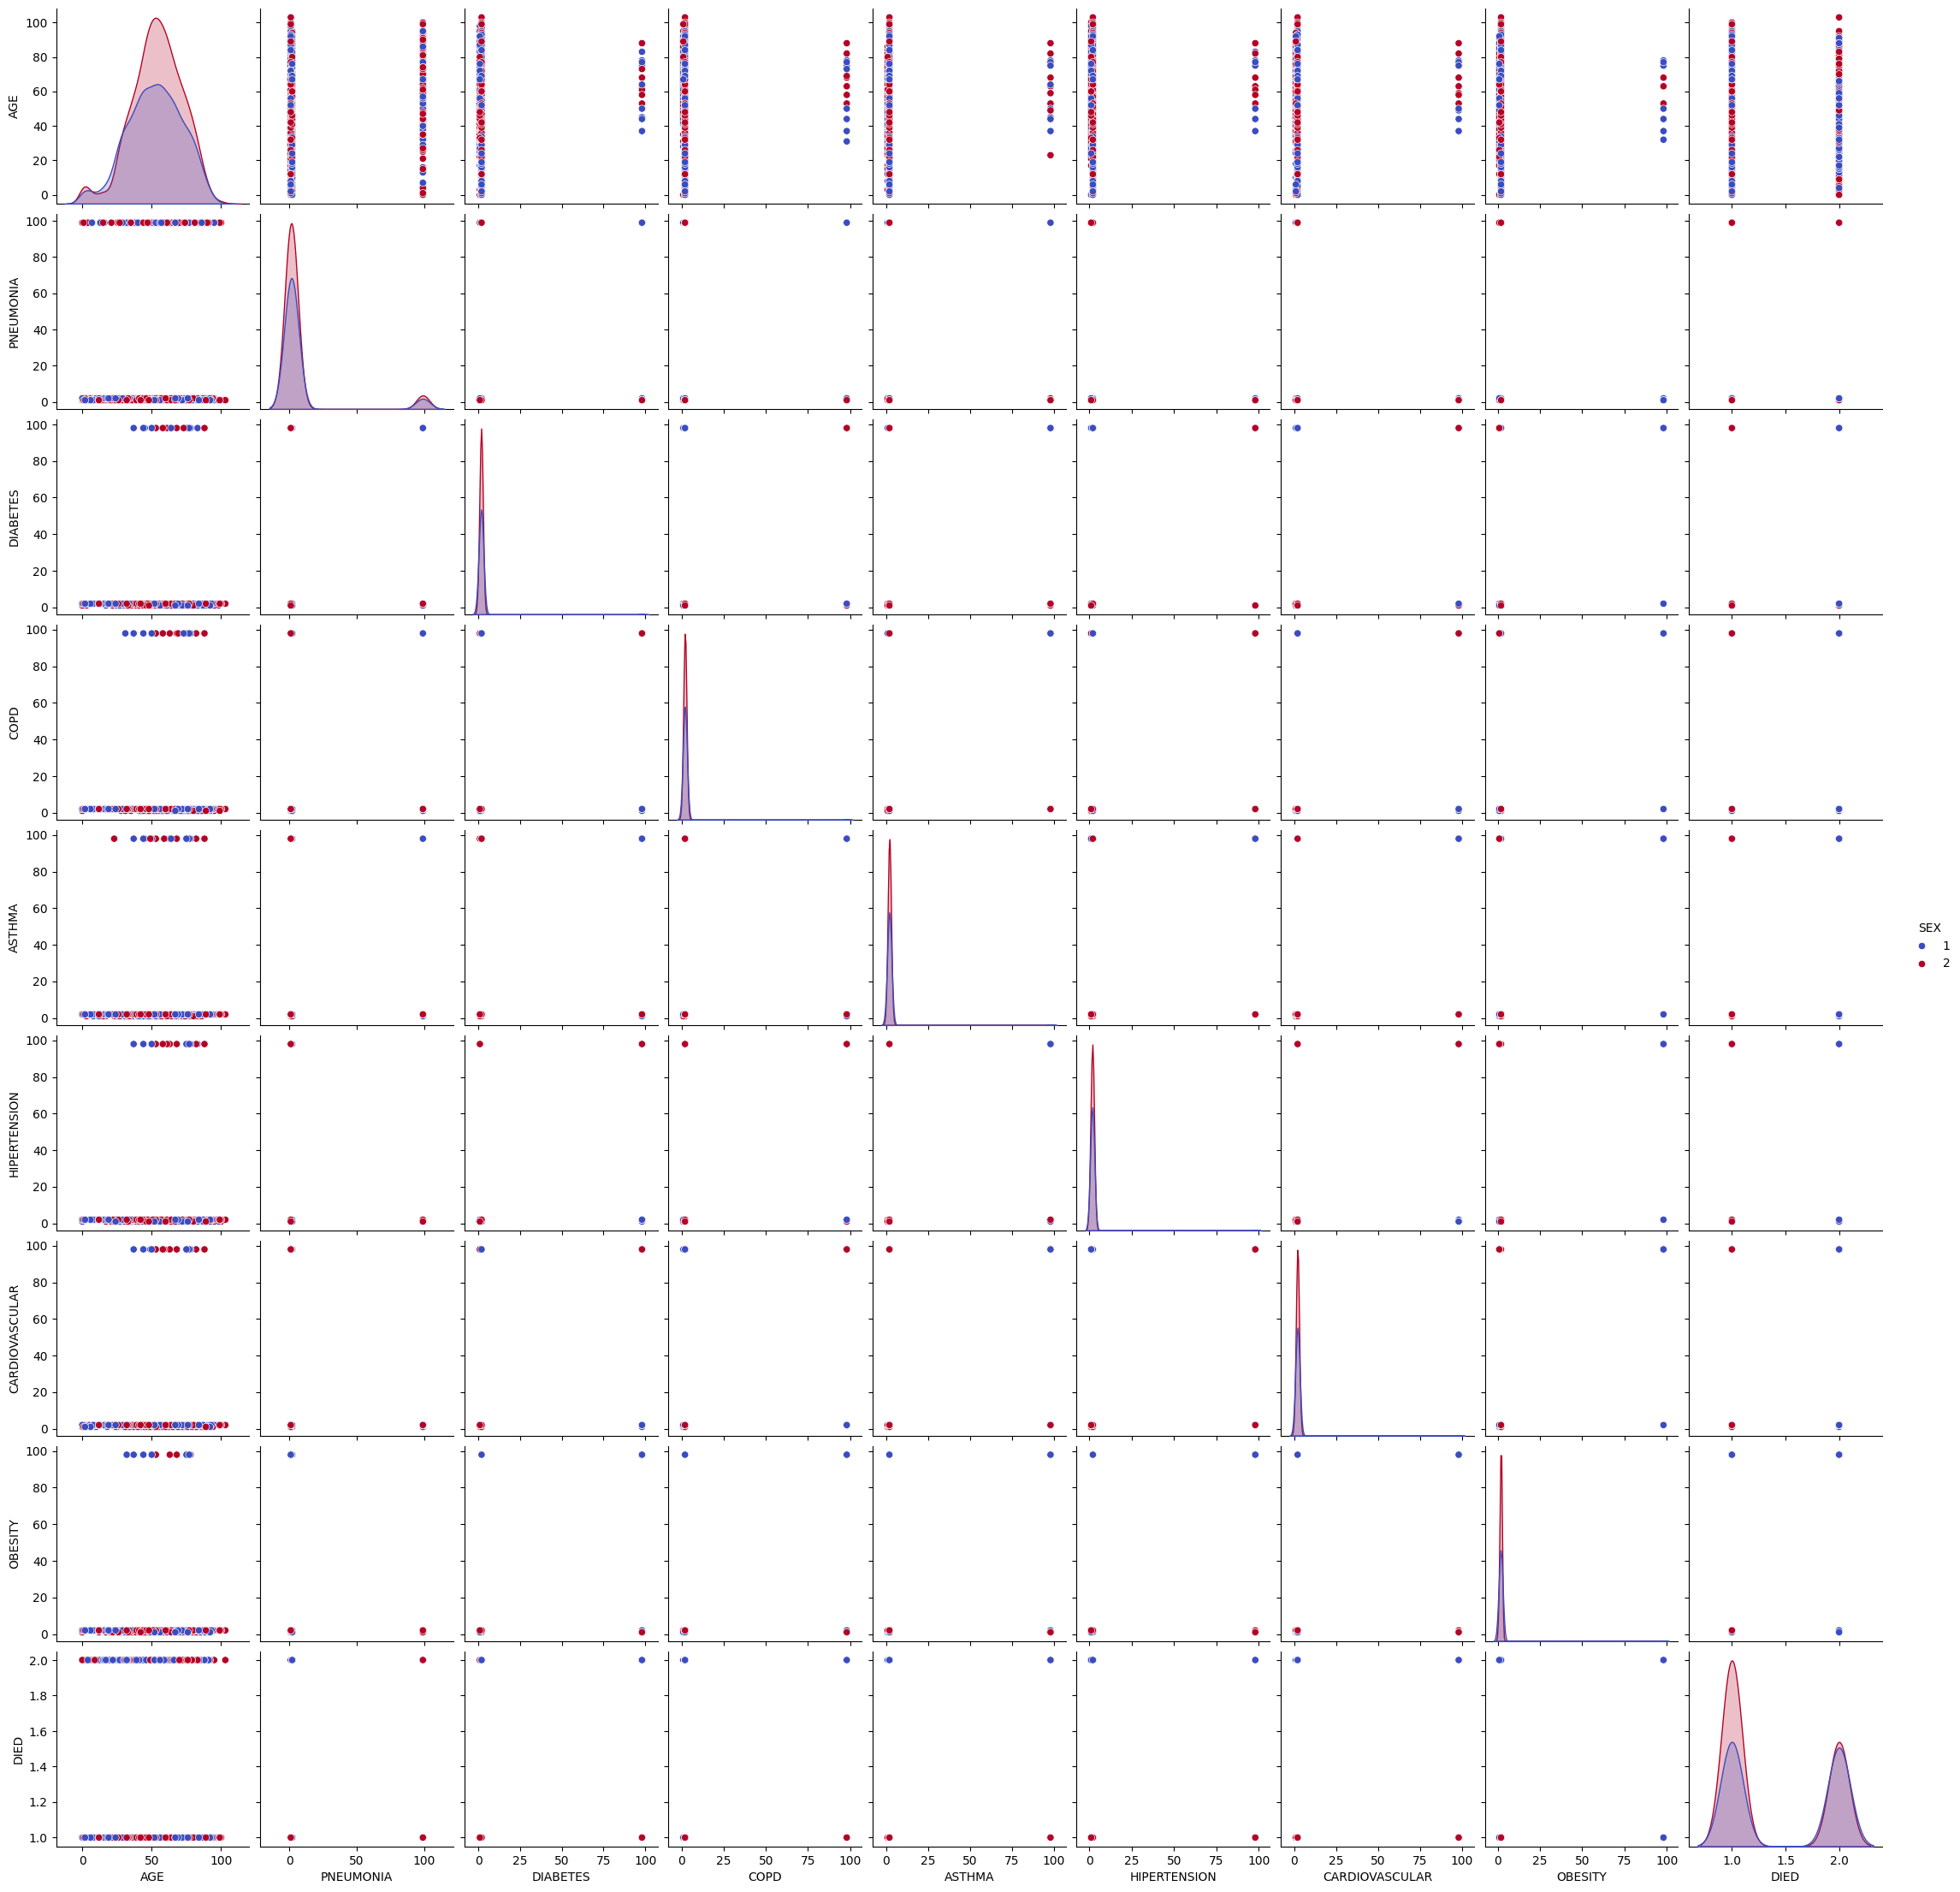

In [421]:
selected_columns = ['AGE', 'PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'HIPERTENSION',
                   'CARDIOVASCULAR', 'OBESITY', 'DIED']

sns.pairplot(df[selected_columns + ['SEX']], hue='SEX', palette='coolwarm')

# Show the plot
plt.show()

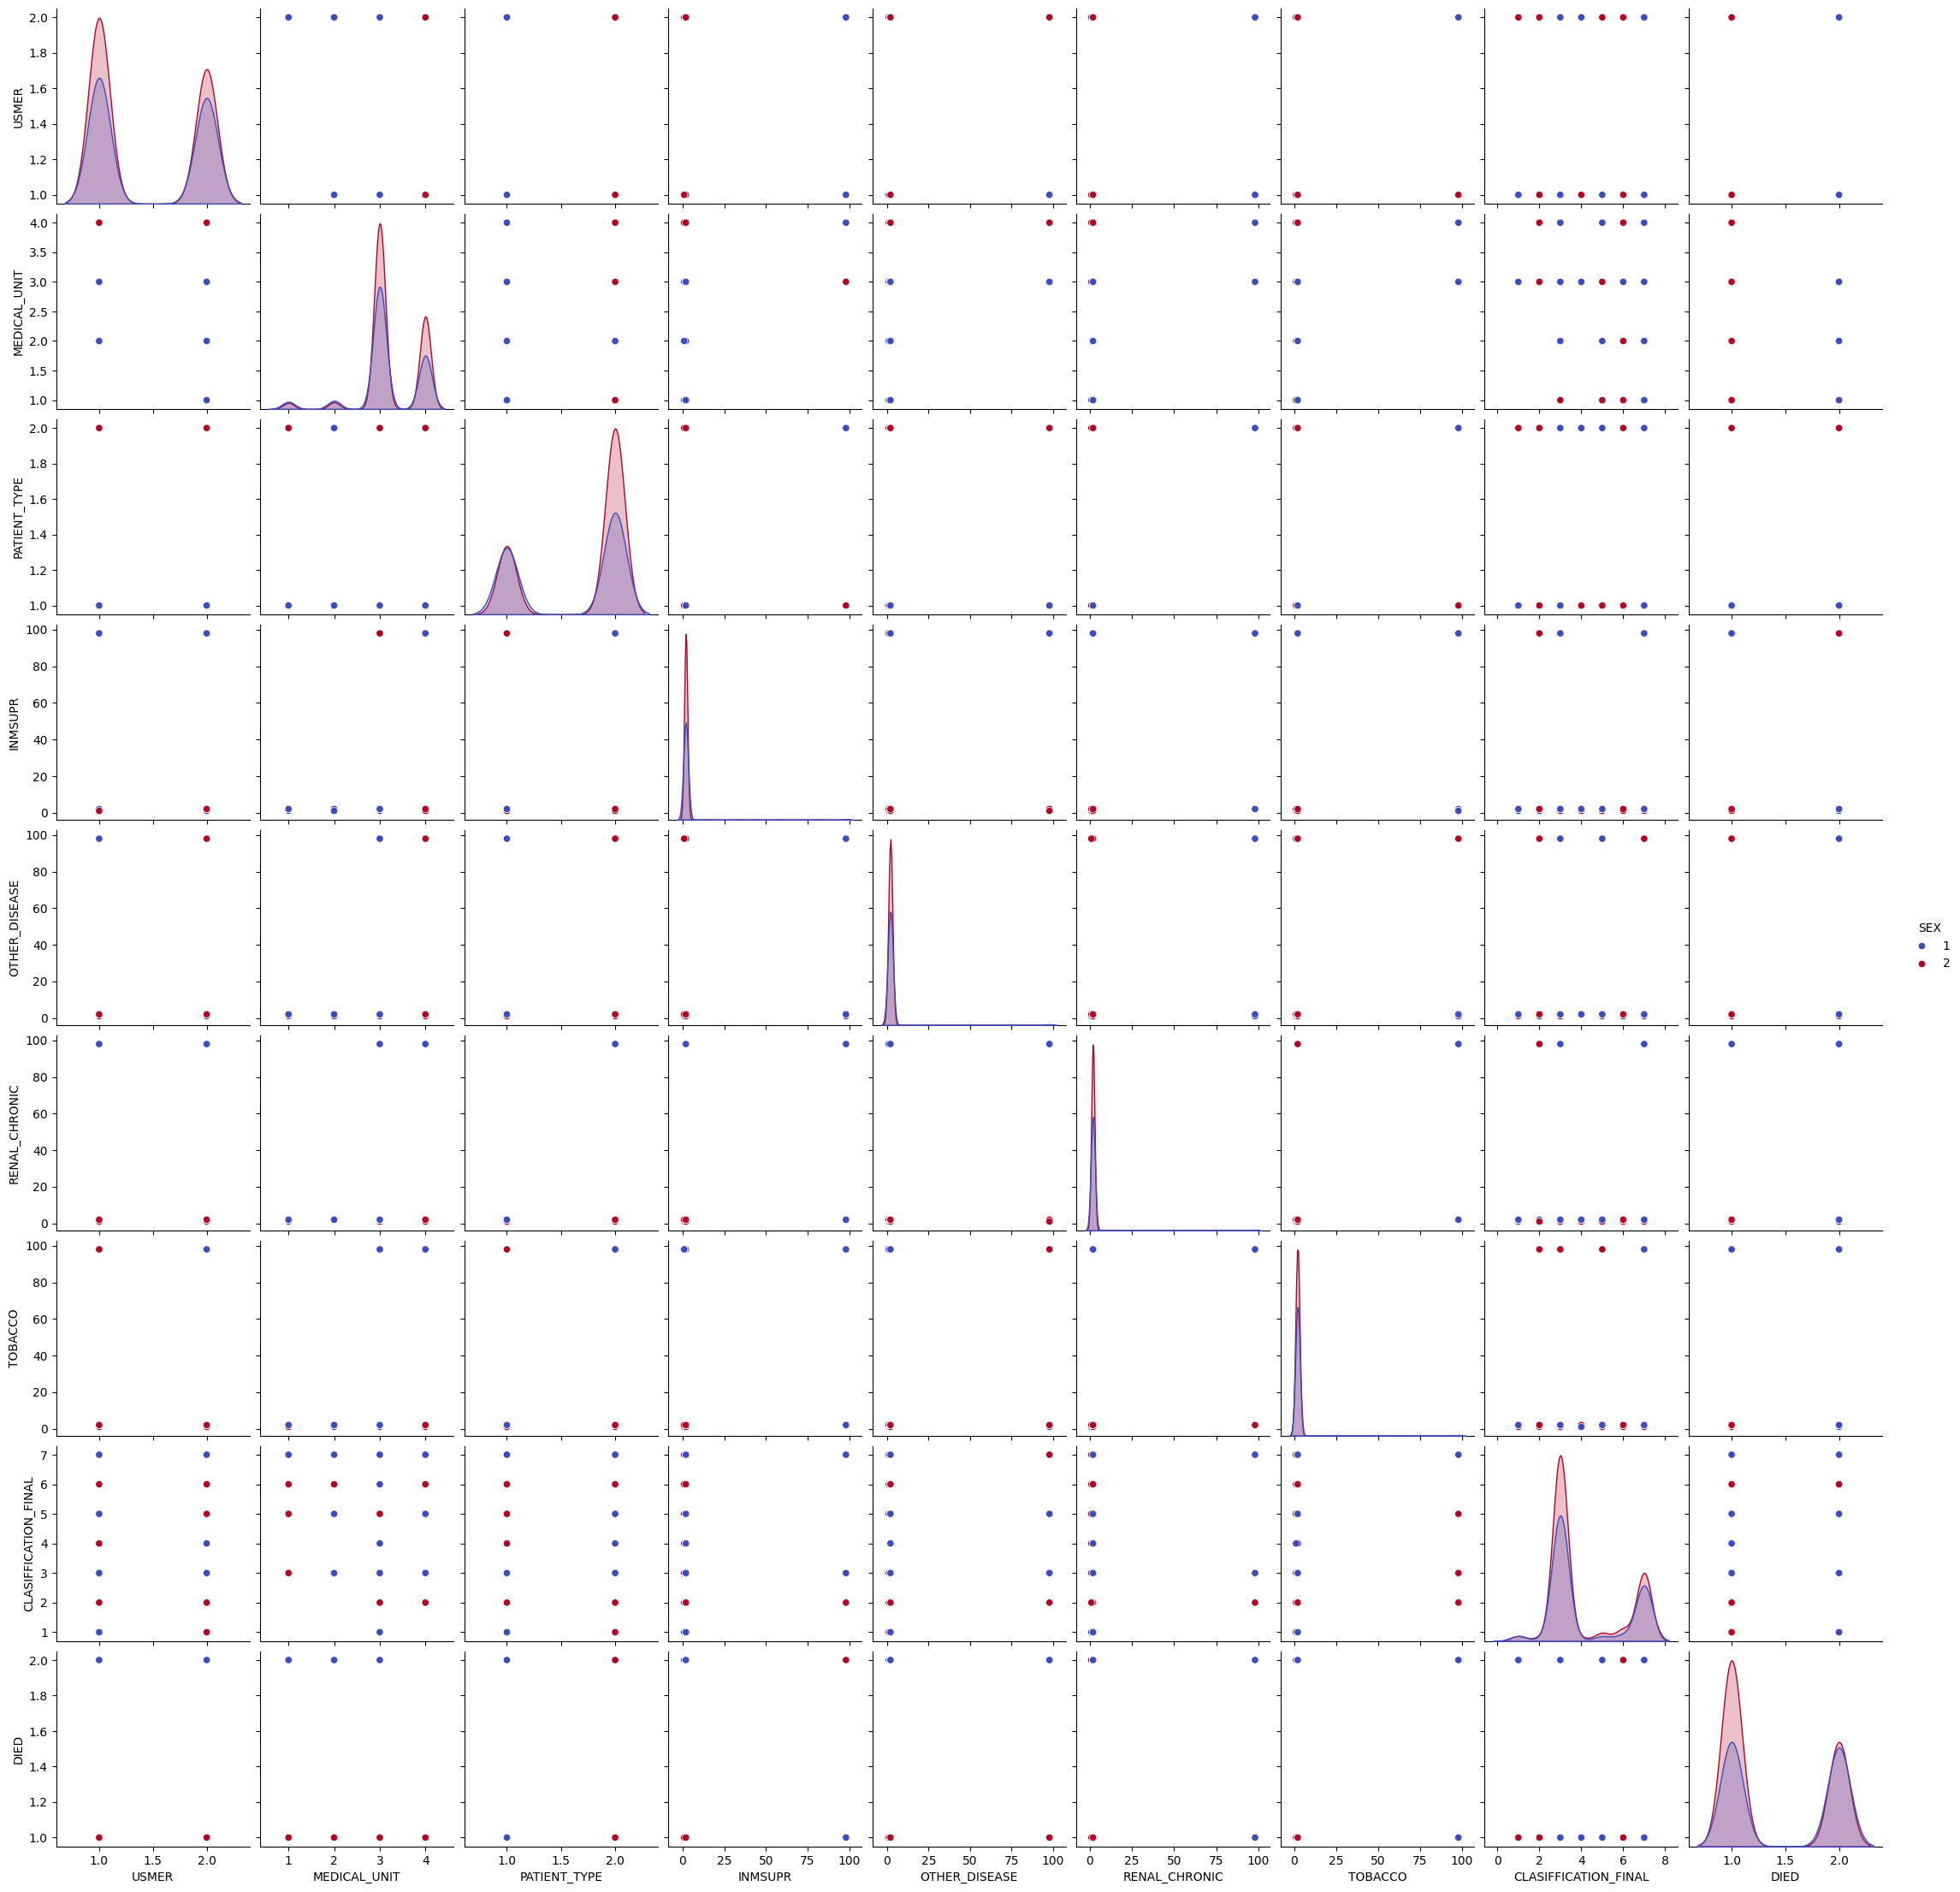

In [422]:
selected_columns = ['USMER', 'MEDICAL_UNIT', 'PATIENT_TYPE', 'INMSUPR', 'OTHER_DISEASE',
                   'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'DIED']
sns.pairplot(df[selected_columns + ['SEX']], hue='SEX', palette='coolwarm')

plt.show()


Correlation


In [423]:
df2.corr(method="pearson", numeric_only=True)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DIED
USMER,1.000000,-0.172836,-0.035904,-0.274689,0.151820,-0.075139,0.004135,0.020587,0.016000,-0.007020,-0.031267,0.016956,-0.063422,0.005647,-0.067183,0.001680,-0.006202,0.047204,0.159933
MEDICAL_UNIT,-0.172836,1.000000,0.073164,0.416632,-0.210464,0.202436,-0.009385,-0.164700,-0.176579,-0.027824,-0.155972,-0.158666,-0.122348,-0.097740,-0.084111,-0.120801,-0.062111,0.190814,-0.506608
SEX,-0.035904,0.073164,1.000000,0.142926,-0.126852,0.022214,0.055005,0.007763,0.001510,0.070143,0.005722,0.013680,0.053086,-0.027163,0.036637,-0.020684,-0.129435,-0.009073,-0.131933
PATIENT_TYPE,-0.274689,0.416632,0.142926,1.000000,-0.585018,0.397194,-0.014094,-0.253838,-0.100715,0.044092,-0.098442,-0.241122,-0.092763,-0.096941,-0.045371,-0.120475,-0.028307,0.182942,-0.663491
PNEUMONIA,0.151820,-0.210464,-0.126852,-0.585018,1.000000,-0.319616,-0.014775,0.199260,0.067540,-0.059541,0.075298,0.203458,0.061992,0.085918,0.075572,0.070721,0.052757,-0.041077,0.522809
AGE,-0.075139,0.202436,0.022214,0.397194,-0.319616,1.000000,0.063245,-0.280004,-0.230239,0.044038,-0.026638,-0.368279,-0.092247,-0.173846,-0.008600,-0.097507,-0.024978,0.196897,-0.474273
PREGNANT,0.004135,-0.009385,0.055005,-0.014094,-0.014775,0.063245,1.000000,0.000373,-0.010800,-0.008651,-0.009692,-0.024489,0.058166,-0.011417,0.009632,-0.012826,-0.015043,0.018436,-0.006659
DIABETES,0.020587,-0.164700,0.007763,-0.253838,0.199260,-0.280004,0.000373,1.000000,0.096584,-0.009757,0.092914,0.397171,0.028471,0.137704,0.119536,0.200844,0.010737,-0.107130,0.274533
COPD,0.016000,-0.176579,0.001510,-0.100715,0.067540,-0.230239,-0.010800,0.096584,1.000000,0.026772,0.087089,0.121567,0.034095,0.153685,0.043110,0.058231,0.127272,-0.148210,0.151721
ASTHMA,-0.007020,-0.027824,0.070143,0.044092,-0.059541,0.044038,-0.008651,-0.009757,0.026772,1.000000,0.038203,0.026055,0.050814,0.031941,0.058444,0.004265,0.001773,0.018115,-0.047363


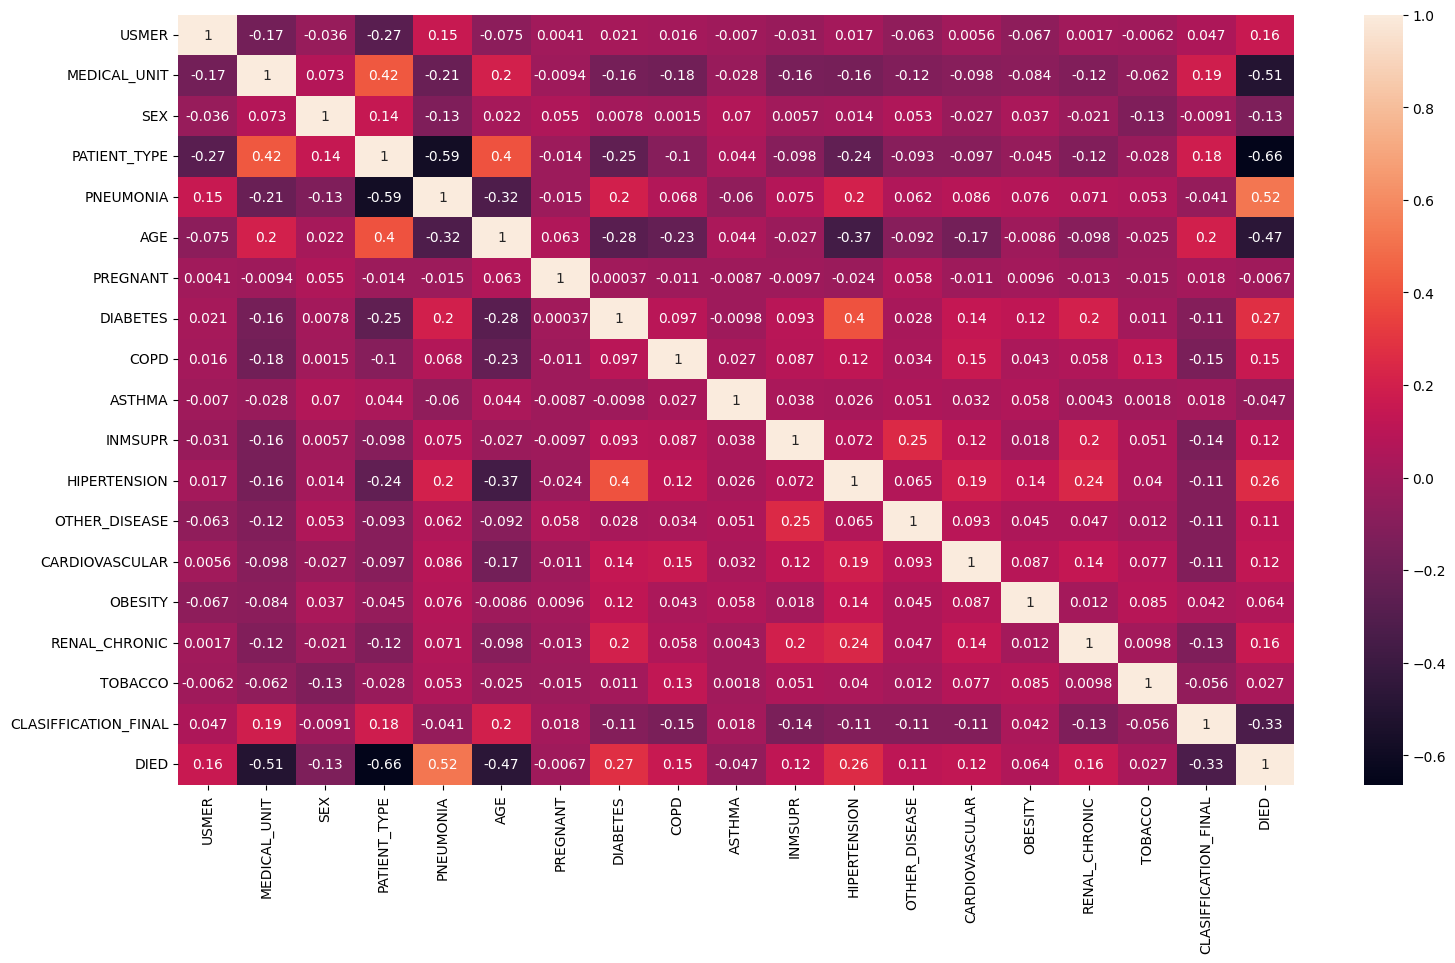

In [424]:
corr=df2.corr(method="pearson", numeric_only=True)
plt.figure(figsize=(18, 10))
sns.heatmap(corr, annot=True)
plt.show()

In [425]:
cor_target = (corr["DIED"])

features_selected = cor_target[(cor_target>0.3) | (cor_target<-0.3)]
features_selected

,DIED
MEDICAL_UNIT,-0.506608
PATIENT_TYPE,-0.663491
PNEUMONIA,0.522809
AGE,-0.474273
CLASIFFICATION_FINAL,-0.327935
DIED,1.000000


In [448]:
columns_to_keep = ['MEDICAL_UNIT', 'PATIENT_TYPE', 'PNEUMONIA', 'AGE', 'CLASIFFICATION_FINAL' , 'DIED']
df3 = df2[columns_to_keep]

In [449]:
df3

,MEDICAL_UNIT,PATIENT_TYPE,PNEUMONIA,AGE,CLASIFFICATION_FINAL,DIED
0,1,1,1,65,3,1
1,1,1,1,72,5,1
2,1,2,2,55,3,1
3,1,1,2,53,7,1
4,1,1,2,68,3,1
...,...,...,...,...,...,...
5280,4,2,1,77,5,1
5281,4,2,2,67,5,1
5283,4,2,2,76,6,1
5284,4,2,1,32,6,1


In [450]:
X = df3.drop("DIED", axis=1)
y = df3['DIED']

In [451]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Supervised

In [453]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
random_forest_model.fit(X_train, y_train)

# Predictions and Metrics for Random Forest
y_pred_rf = random_forest_model.predict(X_test)
random_forest_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1-Score": f1_score(y_test, y_pred_rf),
}
print("Test Performance:")
random_forest_metrics

Test Performance:


{'Accuracy': 0.8947951273532669,
 'Precision': 0.9005328596802842,
 'Recall': 0.9285714285714286,
 'F1-Score': 0.9143372407574392}

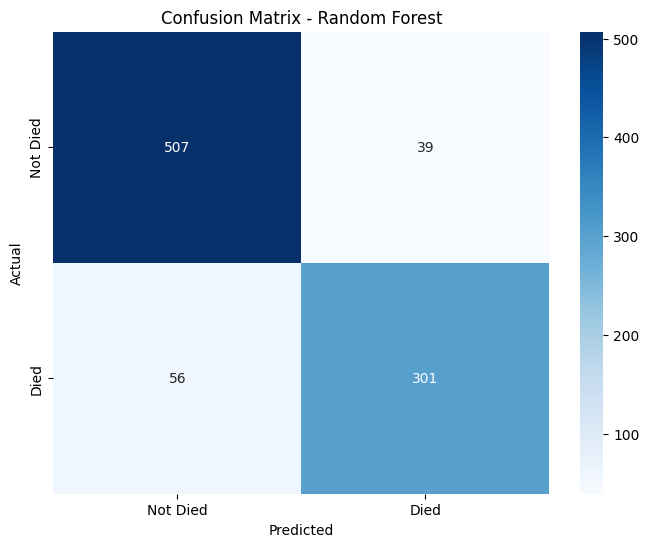

In [431]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have y_test and y_test_pred from your previous code

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Died', 'Died'],
            yticklabels=['Not Died', 'Died'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Example

In [462]:
new_patient = {
    'MEDICAL_UNIT': 1,
    'PATIENT_TYPE': 0,
    'PNEUMONIA': 0,
    'AGE': 0,

    'CLASIFFICATION_FINAL': 4
}

new_patient_df = pd.DataFrame([new_patient])

new_patient_df = pd.get_dummies(new_patient_df, drop_first=True)
new_patient_scaled = scaler.transform(new_patient_df)

rf_prediction = random_forest_model.predict(new_patient_scaled)
rf_prediction_prob = random_forest_model.predict_proba(new_patient_scaled)


# Display results
print("Random Forest Prediction:")
print(f"Predicted Class: {'Died' if rf_prediction[0] == 1 else 'Survived'}")

Random Forest Prediction:
Predicted Class: Died


unsupervised

In [433]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Silhouette Score after PCA: 0.84


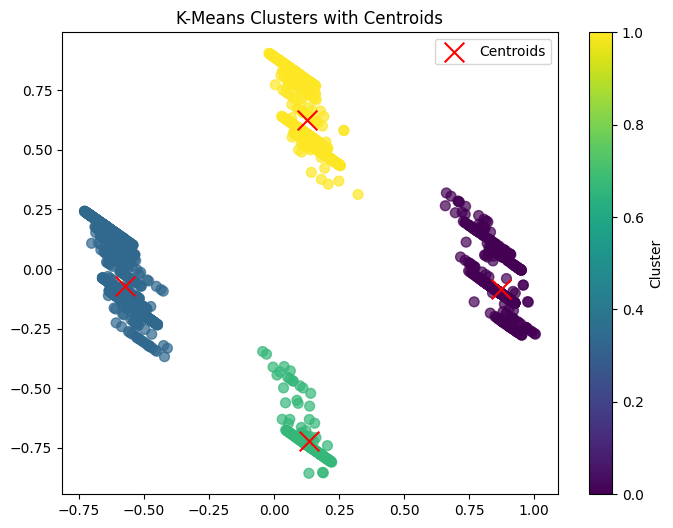

In [434]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_train_pca)

cluster_labels = kmeans.predict(X_train_pca)
silhouette_avg = silhouette_score(X_train_pca, cluster_labels)
print(f"Silhouette Score after PCA: {silhouette_avg:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.7)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')

plt.title(f'K-Means Clusters with Centroids')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


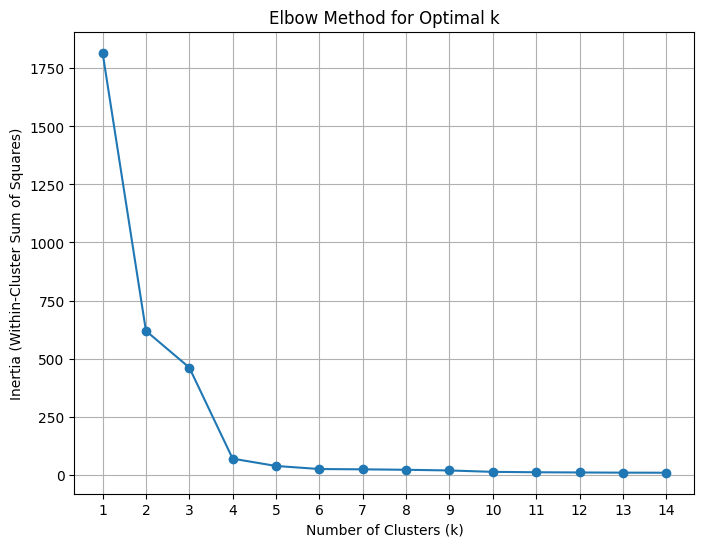

In [435]:
inertia_values = []
k_range = range(1, 15)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

#Neural Networks

In [436]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [437]:
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [438]:
model = models.Sequential([
    # First hidden layer
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Second hidden layer
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Third hidden layer
    layers.Dense(16, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Output layer
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [439]:

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [440]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7307 - loss: 0.5526 - val_accuracy: 0.6667 - val_loss: 0.5279
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8300 - loss: 0.3923 - val_accuracy: 0.8272 - val_loss: 0.4332
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8380 - loss: 0.3435 - val_accuracy: 0.8394 - val_loss: 0.3219
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8481 - loss: 0.3429 - val_accuracy: 0.8904 - val_loss: 0.2626
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8522 - loss: 0.3130 - val_accuracy: 0.9025 - val_loss: 0.2455
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8670 - loss: 0.2939 - val_accuracy: 0.8959 - val_loss: 0.2409
Epoch 7/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8542 - loss: 0.3194 - val_accuracy: 0.8948 - val_loss: 0.2378
Epoch 8/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8571 - loss: 0.3050 - val_accuracy: 0.

In [441]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

29/29 - 0s - 2ms/step - accuracy: 0.8948 - loss: 0.2271
Test accuracy: 0.89


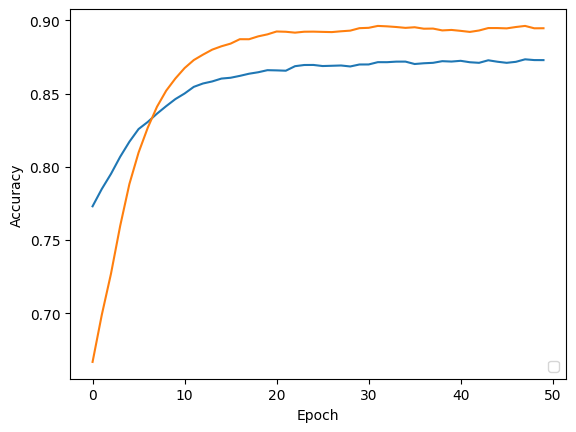

In [442]:
def smooth_curve(points, factor=0.8):
    s_points = []
    for point in points:
        if s_points:
            s_points.append(s_points[-1] * factor + point * (1 - factor))
        else:
            s_points.append(point)
    return s_points

train_accuracy = smooth_curve(history.history['accuracy'])
val_accuracy = smooth_curve(history.history['val_accuracy'])

plt.plot(train_accuracy)
plt.plot(val_accuracy)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [467]:
new_patient = {
    'MEDICAL_UNIT': 1,
    'PATIENT_TYPE': 1,
    'PNEUMONIA': 1,
    'AGE':1,
    'CLASIFFICATION_FINAL': 100
}

new_patient_array = np.array([[new_patient['MEDICAL_UNIT'],
                               new_patient['PATIENT_TYPE'],
                               new_patient['PNEUMONIA'],
                               new_patient['AGE'],
                               new_patient['CLASIFFICATION_FINAL']]])

predictions = model.predict(new_patient_array)
predicted_class = (predictions > 0.5).astype(int)

status = "Died" if predicted_class[0][0] == 1 else "Alive"

print("Predicted Probability of Death:", predictions[0][0])
print("Patient Status:", status)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Probability of Death: 0.0
Patient Status: Alive
